<a href="https://www.kaggle.com/code/riyapatel1697/nyc-311-customer-service-requests-analysis?scriptVersionId=102265792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nyc-311-customer-service-requests-analysis/NYC311data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
ds = pd.read_csv('/kaggle/input/nyc-311-customer-service-requests-analysis/NYC311data.csv',parse_dates= ['Created Date','Closed Date','Resolution Action Updated Date'], dtype={'Incident Zip':'str'})
ds.shape

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(300698, 53)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  object        
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [5]:
ds = ds.applymap(lambda s:s.lower() if type(s) == str else s)

In [6]:
ds.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,nypd,new york city police department,noise - street/sidewalk,loud music/party,street/sidewalk,10034,71 vermilyea avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,nypd,new york city police department,blocked driveway,no access,street/sidewalk,11105,27-07 23 avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,nypd,new york city police department,blocked driveway,no access,street/sidewalk,10458,2897 valentine avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,nypd,new york city police department,illegal parking,commercial overnight parking,street/sidewalk,10461,2940 baisley avenue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,nypd,new york city police department,illegal parking,blocked sidewalk,street/sidewalk,11373,87-14 57 road,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [7]:
ds.isna().sum().where(lambda x:x>0).dropna()

Closed Date                         2164.0
Descriptor                          5914.0
Location Type                        131.0
Incident Zip                        2615.0
Incident Address                   44410.0
Street Name                        44410.0
Cross Street 1                     49279.0
Cross Street 2                     49779.0
Intersection Street 1             256840.0
Intersection Street 2             257336.0
Address Type                        2815.0
City                                2614.0
Landmark                          300349.0
Facility Type                       2171.0
Due Date                               3.0
Resolution Action Updated Date      2187.0
X Coordinate (State Plane)          3540.0
Y Coordinate (State Plane)          3540.0
School Region                          1.0
School Code                            1.0
School Zip                             1.0
School or Citywide Complaint      300698.0
Vehicle Type                      300698.0
Taxi Compan

In [8]:
#drop the columns which are completly/almost empty
na_col_count = ds.isna().sum().where(lambda x:x>0).dropna()
columns_to_drop = []
for column in na_col_count.iteritems():
    if(column[1]/8275 >= 0.85):
        columns_to_drop.append(column[0])
ds.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
#drop the columns which have unspecified values for all rows
cols = ['Agency','Agency Name','Community Board','Borough','Park Facility Name','Park Borough','School Region','School Code', 'School Name','School Number','School Phone Number','School Address','School City','School State','School Not Found','School Zip']
for col in cols:
    print(ds[col].value_counts())
    print()

nypd    300698
Name: Agency, dtype: int64

new york city police department    300690
internal affairs bureau                 6
nypd                                    2
Name: Agency Name, dtype: int64

12 manhattan                 12390
01 brooklyn                  10920
05 queens                     9422
01 queens                     9197
09 queens                     8013
                             ...  
84 queens                       11
56 brooklyn                      9
80 queens                        7
unspecified staten island        2
unspecified queens               2
Name: Community Board, Length: 75, dtype: int64

brooklyn         98307
queens           80641
manhattan        66131
bronx            40702
staten island    12343
unspecified       2574
Name: Borough, dtype: int64

unspecified                        300697
alley pond park - nature center         1
Name: Park Facility Name, dtype: int64

brooklyn         98307
queens           80641
manhattan        66131
bron

In [10]:
cols_to_drop = ['School Region','School Code','School Name','School Number','School Phone Number','School Address','School City','School State','School Not Found', 'School Zip', 'Park Facility Name']
ds.drop(cols,axis=1,inplace=True)

In [11]:
ds.rename(columns ={'X Coordinate (State Plane)':'XCorr','Y Coordinate (State Plane)':'YCorr'}, inplace=True)
ds[['XCorr','YCorr','Latitude','Longitude','Location']].head()

,XCorr,YCorr,Latitude,Longitude,Location
0,1005409.0,254678.0,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,1007766.0,221986.0,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,1015081.0,256380.0,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,1031740.0,243899.0,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,1019123.0,206375.0,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [12]:
ds.drop(['Location'], axis=1,inplace=True)

In [13]:
ds.isna().sum().where(lambda x:x>0).dropna()

Closed Date                       2164.0
Descriptor                        5914.0
Location Type                      131.0
Incident Zip                      2615.0
Address Type                      2815.0
City                              2614.0
Facility Type                     2171.0
Due Date                             3.0
Resolution Action Updated Date    2187.0
XCorr                             3540.0
YCorr                             3540.0
Latitude                          3540.0
Longitude                         3540.0
dtype: float64

In [14]:
ds.dropna(subset=['Due Date', 'Location Type'],axis=0,inplace=True) #drop rows for which duedate amd location type is na(134 rows dropped)
ds.isna().sum().where(lambda x:x>0).dropna()

Closed Date                       2159.0
Descriptor                        5904.0
Incident Zip                      2604.0
Address Type                      2804.0
City                              2603.0
Facility Type                     2159.0
Resolution Action Updated Date    2146.0
XCorr                             3529.0
YCorr                             3529.0
Latitude                          3529.0
Longitude                         3529.0
dtype: float64

In [15]:
ds['Facility Type'].value_counts()

precinct    298406
Name: Facility Type, dtype: int64

In [16]:
ds['Facility Type'].fillna('precinct',inplace=True)

In [17]:
ds.isna().sum().where(lambda x:x>0).dropna()

Closed Date                       2159.0
Descriptor                        5904.0
Incident Zip                      2604.0
Address Type                      2804.0
City                              2603.0
Resolution Action Updated Date    2146.0
XCorr                             3529.0
YCorr                             3529.0
Latitude                          3529.0
Longitude                         3529.0
dtype: float64

In [18]:
city = ds['City'].mode()[0]
zipcode = ds.loc[ds['City'] == city, 'Incident Zip'].mode()[0]
latitude = ds.loc[ds['Incident Zip'] == zipcode,'Latitude'].mode()[0]
longitude = ds.loc[ds['Incident Zip'] == zipcode,'Longitude'].mode()[0]
xcorr = ds.loc[ds['Incident Zip'] == zipcode,'XCorr'].mode()[0]
ycorr = ds.loc[ds['Incident Zip'] == zipcode,'YCorr'].mode()[0]

In [19]:
ds.fillna(value={'City':city,'Incident Zip':zipcode,'Latitude':latitude,'Longitude':longitude,'XCorr':xcorr,'YCorr':ycorr},axis=0,inplace=True)

In [20]:
#this code is not working
complaintTypes = ds['Complaint Type'].unique()

for ct in complaintTypes:
    cd = (ds['Complaint Type'] == ct)
    mode = ds.loc[cd, 'Descriptor'].mode().get(0)
    ds.loc[cd,'Descriptor'] = ds.loc[cd,'Descriptor'].fillna(value={'Descriptor':mode})

ds.dropna(subset=['Descriptor'],axis=0,inplace=True)

In [21]:
ds.isna().sum().where(lambda x:x>0).dropna()

Closed Date                       2154.0
Address Type                      2779.0
Resolution Action Updated Date    2141.0
dtype: float64

In [22]:
ds[ds['Closed Date'].isnull() & ds['Resolution Action Updated Date'].isnull()]['Status'].value_counts()

open        1396
assigned     742
draft          1
Name: Status, dtype: int64

In [23]:
ds['Request_Closing_Time'] = (ds['Closed Date'] - ds['Created Date']).dt.seconds
ds['Request_Closing_Time'] = ds['Request_Closing_Time']/3600

In [24]:
ds.isna().sum().where(lambda x:x>0).dropna()

Closed Date                       2154.0
Address Type                      2779.0
Resolution Action Updated Date    2141.0
Request_Closing_Time              2154.0
dtype: float64

In [25]:
#total complaints based on category
#citywise complaint counts(total)
#citywise complaint counts(typewise)
#scatterplot/hexbin plot of la

In [26]:
top5cities = ds['City'].value_counts().head(5).index.to_list()
top5cities

['brooklyn', 'new york', 'bronx', 'staten island', 'jamaica']

In [27]:
dstop5 = ds[(ds['City'] == top5cities[0]) | (ds['City'] == top5cities[1]) | (ds['City'] == top5cities[2]) | (ds['City'] == top5cities[3]) | (ds['City'] == top5cities[4])]
dstop5

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,XCorr,YCorr,Latitude,Longitude,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,noise - street/sidewalk,loud music/party,street/sidewalk,10034,address,new york,precinct,closed,01-01-16 7:59,the police department responded and upon arriv...,2016-01-01 00:55:00,1005409.0,254678.0,40.865682,-73.923501,0.920833
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,blocked driveway,no access,street/sidewalk,10458,address,bronx,precinct,closed,01-01-16 7:59,the police department responded and upon arriv...,2016-01-01 04:51:00,1015081.0,256380.0,40.870325,-73.888525,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,illegal parking,commercial overnight parking,street/sidewalk,10461,address,bronx,precinct,closed,01-01-16 7:57,the police department responded to the complai...,2016-01-01 07:43:00,1031740.0,243899.0,40.835994,-73.828379,7.753889
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,illegal parking,posted parking sign violation,street/sidewalk,11215,address,brooklyn,precinct,closed,01-01-16 7:56,the police department responded and upon arriv...,2016-01-01 01:50:00,986312.0,180032.0,40.660823,-73.992568,1.891667
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:00,illegal parking,blocked hydrant,street/sidewalk,10032,address,new york,precinct,closed,01-01-16 7:55,the police department issued a summons in resp...,2016-01-01 01:53:00,1001578.0,245627.0,40.840848,-73.937375,1.957778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,2015-03-29 00:34:32,2015-03-29 01:13:01,noise - commercial,loud music/party,store/commercial,10002,address,new york,precinct,closed,03/29/2015 08:34:32 am,the police department responded to the complai...,2015-03-29 01:13:01,986640.0,200154.0,40.716053,-73.991378,0.641389
300693,30281872,2015-03-29 00:33:41,NaT,noise - commercial,loud music/party,club/bar/restaurant,11211,NaN,brooklyn,precinct,open,03/29/2015 08:33:41 am,your complaint has been forwarded to the new y...,NaT,996985.0,197461.0,40.708652,-73.954066,NaN
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,noise - commercial,loud music/party,club/bar/restaurant,11206,address,brooklyn,precinct,closed,03/29/2015 08:33:03 am,the police department responded to the complai...,2015-03-29 03:40:20,999713.0,194161.0,40.699590,-73.944234,3.121389
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,noise - commercial,loud music/party,club/bar/restaurant,10461,address,bronx,precinct,closed,03/29/2015 08:33:02 am,the police department responded to the complai...,2015-03-29 04:38:35,1030021.0,244520.0,40.837708,-73.834587,4.092500


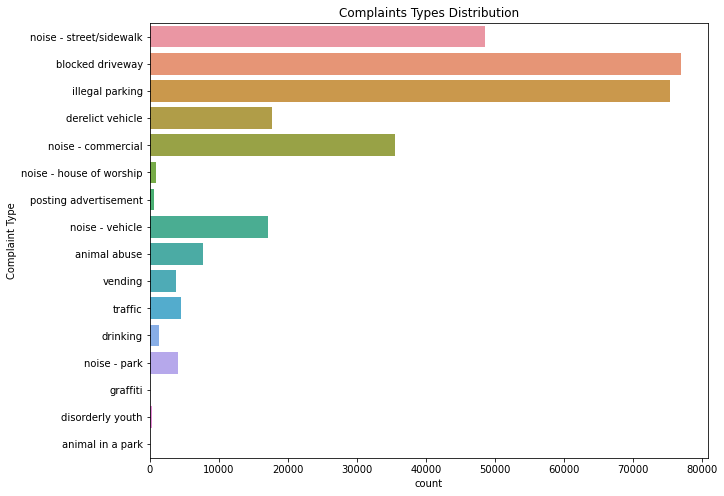

In [28]:
#total complaints based on category

plt.figure(figsize=(10,8))
plt.title('Complaints Types Distribution')
sns.countplot(y='Complaint Type', data=ds)
plt.show()

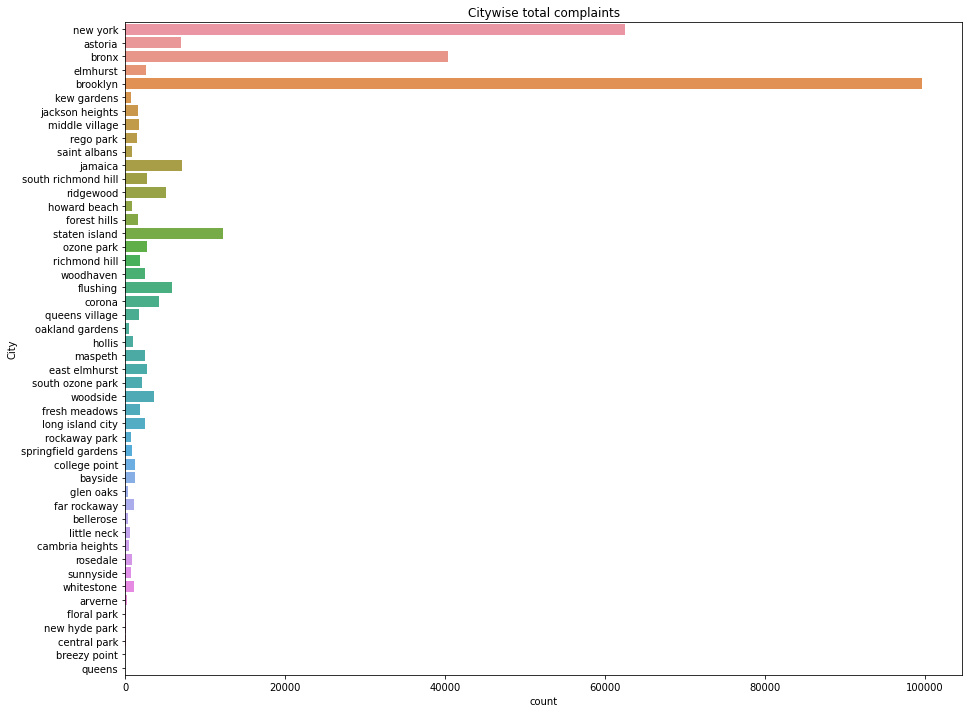

In [29]:
#citywise complaint counts(total)
plt.figure(figsize=(15,12))
plt.title('Citywise total complaints')
sns.countplot(y='City',data=ds)
plt.show()

In [30]:
#citywise complaint counts(typewise)
df1 = pd.DataFrame()
ctypes = dstop5['Complaint Type'].unique()
for ct in ctypes:
    df1[ct]=dstop5[dstop5['Complaint Type']==ct]['City'].value_counts()
df1

,noise - street/sidewalk,blocked driveway,illegal parking,noise - commercial,noise - house of worship,posting advertisement,noise - vehicle,vending,traffic,derelict vehicle,animal abuse,drinking,noise - park,graffiti,disorderly youth
new york,20431,2071,12126,14549,194,41,5484,2398,1546,537,1525,295,1211,22,69
brooklyn,13965,28414,28490,11838,342,46,5230,521,1088,5349,2404,265,1580,43,72
bronx,8892,12751,7855,2434,79,16,3395,379,355,1952,1414,187,547,9,63
staten island,819,2142,4883,678,17,516,356,25,199,1764,557,175,67,2,23
jamaica,334,2817,1421,427,13,7,302,20,560,954,229,34,38,3,8


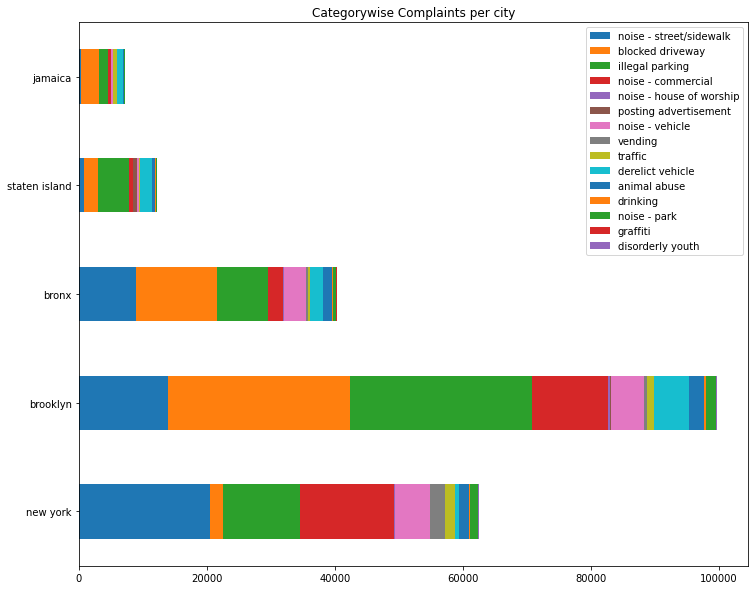

In [31]:
##citywise complaint counts(typewise)
df1.plot(kind='barh',stacked=True,figsize=(12,10))
plt.title('Categorywise Complaints per city')
plt.show()

In [32]:
gbcities = ds.groupby(['City','Complaint Type']).agg({'Request_Closing_Time':'mean'}).sort_values('Request_Closing_Time',ascending=False).reset_index().groupby('City')

In [33]:
df = pd.DataFrame(columns=['City','Complaint Type','Request_Closing_Time'])
for city, city_data in gbcities:
    if(city in top5cities):
        df = pd.concat([df, pd.DataFrame(city_data)],ignore_index=True)
df

,City,Complaint Type,Request_Closing_Time
0,bronx,graffiti,8.899043
1,bronx,derelict vehicle,7.434782
2,bronx,animal abuse,6.200279
3,bronx,illegal parking,5.746186
4,bronx,vending,5.622531
...,...,...,...
70,staten island,noise - commercial,3.000536
71,staten island,noise - street/sidewalk,2.969042
72,staten island,noise - park,2.933586
73,staten island,noise - house of worship,2.503382


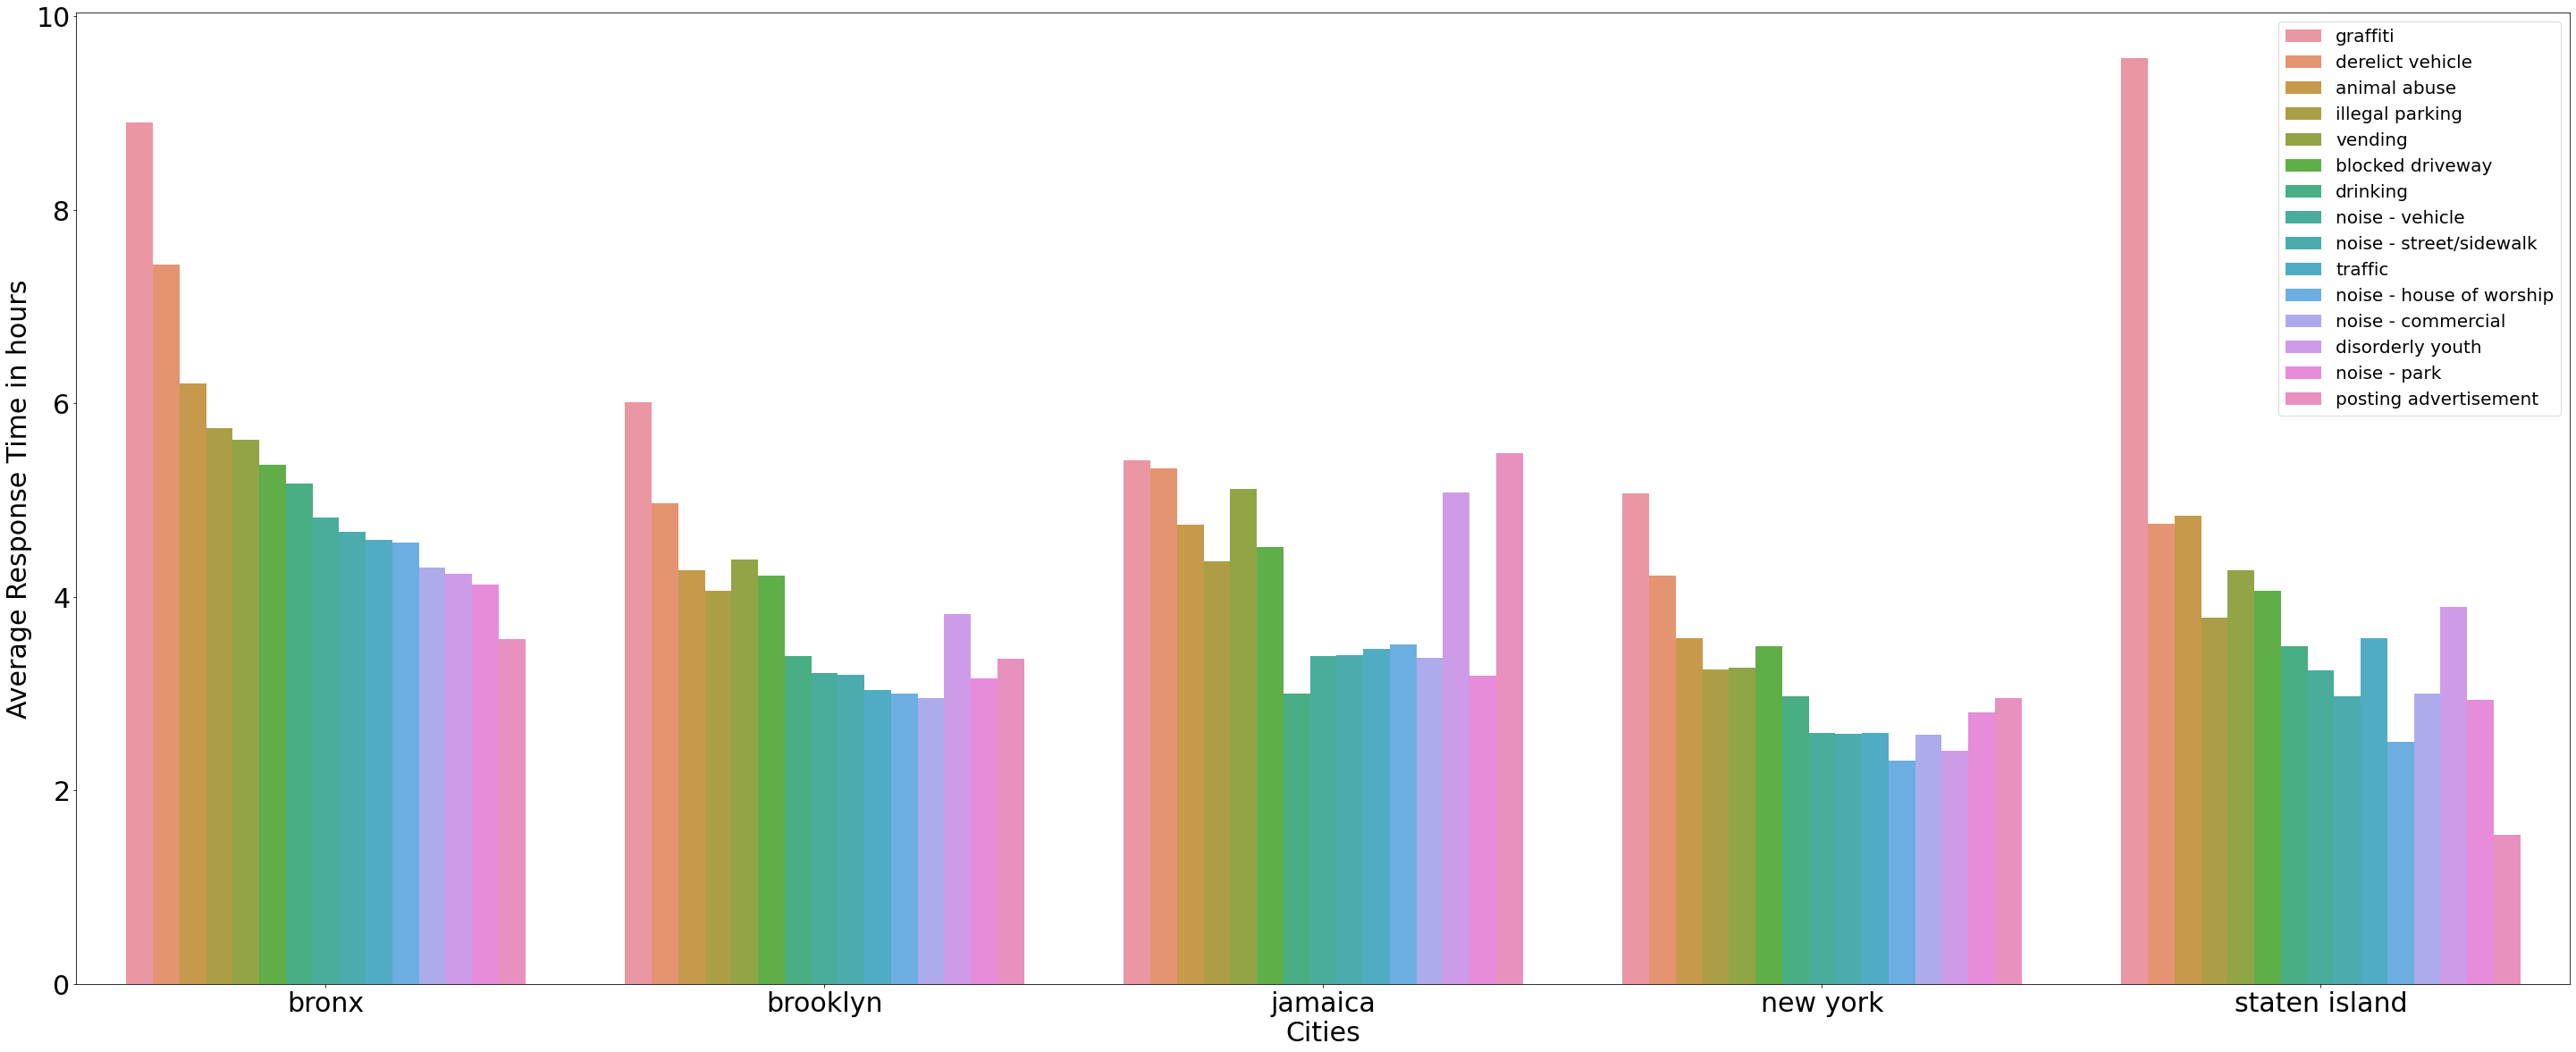

In [34]:
plt.figure(figsize=(50,20))
sns.barplot(data=df,x='City',y='Request_Closing_Time',hue='Complaint Type')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Average Response Time in hours',fontsize=30)
plt.xlabel('Cities',fontsize=30)
plt.legend(loc='upper right',fontsize=20)
plt.show()

In [35]:
#Hypothesis testing